<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/10_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 설명
[Download sample dataset](https://bit.ly/wine_csv_data)
* 알코올 도수(alcohol), 당도(sugar), pH값(pH)으로 와인 종류(class)를 구별해야 한다.

# Try 1. Logistic Regression

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [2]:
# 새롭게 배운 pandas df method(1)
# sample 수, data type, missing value 여부(null count)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
# 새롭게 배운 pandas df method(2)
# count = 전체 rows 수 - null rows 수
# mean(Arithmetic mean, Average)
# std(standard deviation)
# minimum value, maximum value
# median = second quartile = 50% quantile
# 25% = first quartile = 25% quantile
# 75% = first quartile = 75% quantile
print(wine['class'].unique())
wine.describe()

[0. 1.]


alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

`pandas` library가 제공하는 method를 사용해서 다음과 같은 정보를 쉽게 파악할 수 있었다.  
* missing value(null)는 없다.
* features 간의 scale이 다르다.
* sugar의 경우, outliar가 존재하는 것으로 추정된다.

먼저, 다음과 같은 작업을 수행하자.  
* **divide** the sample data set into **features** and **target**.
* **split** the sample data set into **train set** and **test set**.
* **Standardize** **features**.

In [6]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    wine_input, wine_target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:3])

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]]


In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


underfitting된 상태라고 추정된다.

In [15]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


따라서 $ z = 1.818 + 0.513x_1 + 1.673x_2 - 0.688x_3  $에 대해서,  
z > 0이면 class 값이 1(양성 클래스), z < 0이면 class 값이 0(음성 클래스)라고 판단할 수 있겠다.  

또한 추측을 하자면, $ x_1 $(알코올 도수)과 $ x_2 $(당도)가 높으면 $ z $값이 커지므로 이 예제에서의 양성 클래스 즉, 화이트 와인일 확률이 높고 $ x_3 $(pH)가 높으면 이 z값이 작아지므로 이 예제에서의 음성 클래스 즉, 레드 와인일 확률이 높을 것이다.  

다만 각 feature에 대한 weight(coefficient)와 intercept가 왜 저 수치여야만 하는지를 설명할 방법이 없다.  
또한 $ x_1, x_2, x_3 $값을 model에 넣었을 때 class 예측 값을 알 수는 있지만, 왜 그렇게 예측하는지를 (특히 실무자가 아닌 결정권자 등의 비전문가에게) 논리있게 설명하기는 어렵다.

# Try 2. Decision Tree


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


accuracy는 매우 높아졌지만, overfitting이라고 판단할 수 있겠다.  
다음 cell에서 decision tree를 시각적으로 그려보자(시간이 조금 걸릴 수 있다).

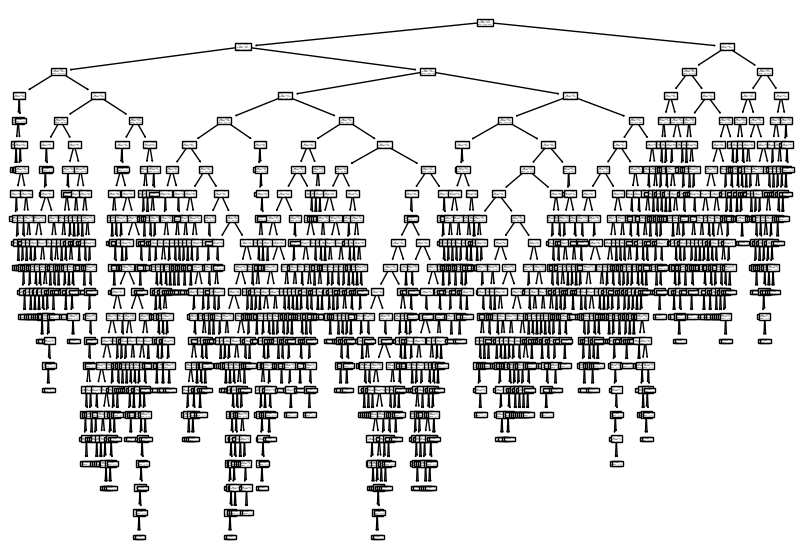

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7)) # figsize scale is inch
plot_tree(dt)
plt.show()

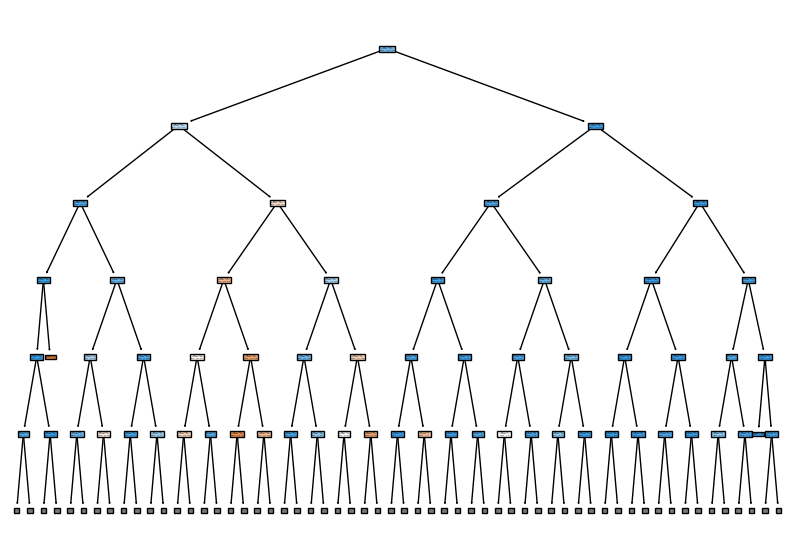

In [19]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=5, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [20]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()